In [1]:
import lbl
from lbl import lbl_wrap
import matplotlib.pyplot as plt
import glob
import numpy as np
from astropy.io import fits
%matplotlib inline

# LBL parameters

In [2]:
rparams = dict()

The instrument name and modes between the following: SPIROU, HARPS, ESPRESSO, CARMENES, NIRPS_HE, NIRPS_HA

In [3]:
rparams['INSTRUMENT'] = 'NIRPS_HE'

Source of the reduced data. Between APERO or ESO

In [4]:
rparams['DATA_SOURCE'] = 'ESO'

Path to the data folder. It must have a structure /science/[target_name]

In [5]:
rparams['DATA_DIR'] = '/home/ecristo/Desktop/Doutoramento/NIRPS_SEMINAR/TEST/NIRPS-data-handling-session/science_DRS'


Path to the calibrations folder

In [6]:
rparams['BLAZE_FILE'] = '/home/ecristo/Desktop/Doutoramento/NIRPS_SEMINAR/TEST/NIRPS-data-handling-session/calib_DRS/r.NIRPS.2023-01-22T14:45:32.460_BLAZE_A.fits'


In [7]:
# -------------------------------------------------------------------------
# science criteria
# -------------------------------------------------------------------------
# The data type (either SCIENCE or FP or LFC)
rparams['DATA_TYPES'] = ['SCIENCE']
# The object name (this is the directory name under the /science/
#    sub-directory and thus does not have to be the name in the header
rparams['OBJECT_SCIENCE'] = ['PROXIMA']
# This is the template that will be used or created (depending on what is
#   run)
rparams['OBJECT_TEMPLATE'] = ['PROXIMA']
# This is the object temperature in K - used for getting a stellar model
#   for the masks it only has to be good to a few 100 K
rparams['OBJECT_TEFF'] = [3000]

In [8]:
# -------------------------------------------------------------------------
# what to run and skip if already on disk
# -------------------------------------------------------------------------
# Whether to run the telluric cleaning process (NOT recommended for data
#   that has better telluric cleaning i.e. SPIROU using APERO)
rparams['RUN_LBL_TELLUCLEAN'] = False
# Whether to create templates from the data in the science directory
#   If a template has been supplied from elsewhere this set is NOT required
rparams['RUN_LBL_TEMPLATE'] = True
# Whether to create a mask using the template created or supplied
rparams['RUN_LBL_MASK'] = True
# Whether to run the LBL compute step - which computes the line by line
#   for each observation
rparams['RUN_LBL_COMPUTE'] = True
# Whether to run the LBL compile step - which compiles the rdb file and
#   deals with outlier rejection
rparams['RUN_LBL_COMPILE'] = True
# whether to skip observations if a file is already on disk (useful when
#   adding a few new files) there is one for each RUN_XXX step
#   - Note cannot skip tellu clean
rparams['SKIP_LBL_TELLUCLEAN'] = False
rparams['SKIP_LBL_TEMPLATE'] = False
rparams['SKIP_LBL_MASK'] = False
rparams['SKIP_LBL_COMPUTE'] = False
rparams['SKIP_LBL_COMPILE'] = False

Run the lbl wrapper

In [9]:
#lbl_wrap(rparams)

The CCF files are saved on */lblrv/PROXIMA_PROXIMA directory

In [10]:
CCF_paths=rparams['DATA_DIR']+"/lblrv/PROXIMA_PROXIMA/"

In [11]:
datafits="*_S2D_BLAZE_A_CORR_PROXIMA_PROXIMA_lbl.fits"
data_path =  glob.glob(CCF_paths+datafits)
print(data_path)

['/home/ecristo/Desktop/Doutoramento/NIRPS_SEMINAR/TEST/NIRPS-data-handling-session/science_DRS/lblrv/PROXIMA_PROXIMA/r.NIRPS.2023-01-23T08:10:46.171_S2D_BLAZE_A_CORR_PROXIMA_PROXIMA_lbl.fits', '/home/ecristo/Desktop/Doutoramento/NIRPS_SEMINAR/TEST/NIRPS-data-handling-session/science_DRS/lblrv/PROXIMA_PROXIMA/r.NIRPS.2023-01-26T08:46:04.642_S2D_BLAZE_A_CORR_PROXIMA_PROXIMA_lbl.fits', '/home/ecristo/Desktop/Doutoramento/NIRPS_SEMINAR/TEST/NIRPS-data-handling-session/science_DRS/lblrv/PROXIMA_PROXIMA/r.NIRPS.2023-01-27T08:14:30.967_S2D_BLAZE_A_CORR_PROXIMA_PROXIMA_lbl.fits', '/home/ecristo/Desktop/Doutoramento/NIRPS_SEMINAR/TEST/NIRPS-data-handling-session/science_DRS/lblrv/PROXIMA_PROXIMA/r.NIRPS.2023-01-23T08:03:42.603_S2D_BLAZE_A_CORR_PROXIMA_PROXIMA_lbl.fits', '/home/ecristo/Desktop/Doutoramento/NIRPS_SEMINAR/TEST/NIRPS-data-handling-session/science_DRS/lblrv/PROXIMA_PROXIMA/r.NIRPS.2023-01-27T08:18:02.752_S2D_BLAZE_A_CORR_PROXIMA_PROXIMA_lbl.fits', '/home/ecristo/Desktop/Doutorament

In [12]:
bjd_drs=[]
rv_drs=[]
rv_error_drs=[]
for path in data_path:
    ccffile = fits.open(path)
    bjd_drs+=[ccffile[0].header["HIERARCH ESO QC BJD"]]
    rv_drs+=[ccffile[0].header["HIERARCH ESO QC CCF RV"]]
    rv_error_drs+=[ccffile[0].header["HIERARCH ESO QC CCF RV ERROR"]]

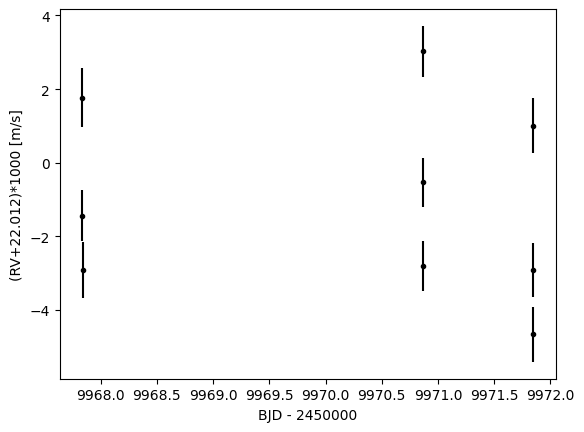

Average photon noise: 72.3cm/s
RV dispersion: 2.41m/s


In [13]:
plt.errorbar(np.array(bjd_drs)-2450000, (np.array(rv_drs)+22.012)*1000, yerr=np.array(rv_error_drs)*1000, fmt=".k")
plt.xlabel("BJD - 2450000")
plt.ylabel("(RV+22.012)*1000 [m/s]")
plt.show()
print("Average photon noise: "+str(round(np.mean(rv_error_drs)*1000*100,2))+"cm/s")
print("RV dispersion: "+str(round(np.std(rv_drs)*1000,2))+"m/s")